In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Parameters
N = 20  # Size of the lattice
J = 1   # Interaction strength
kB = 1  # Boltzmann constant
num_iterations = 10**6
delta_T = 0.25

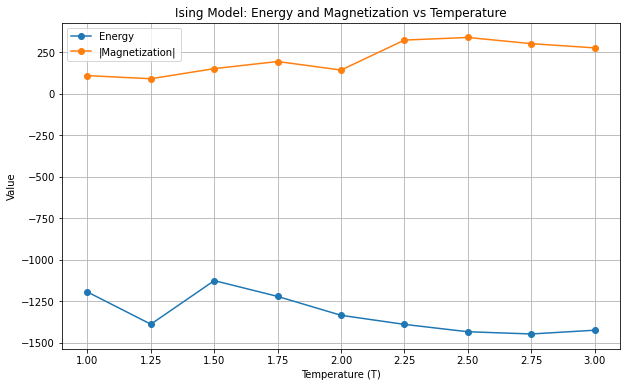

In [7]:
def initial_lattice(N): # Initialize lattice with random spins
    return np.random.choice([-1, 1], size=(N, N))

def total_energy(lattice):
    return -J * np.sum(lattice * (np.roll(lattice, 1, axis=0) + np.roll(lattice, -1, axis=0) +
                                np.roll(lattice, 1, axis=1) + np.roll(lattice, -1, axis=1)))

def metropolis_acceptance(old_energy, new_energy, temperature):
    if new_energy <= old_energy:
        return True
    probability = np.exp(-1.0 / (kB * temperature) * (new_energy - old_energy))
    return np.random.random() < probability

def simulate_ising_model(temperature):
    lattice = initial_lattice(N)
    energies = []
    magnetizations = []

    for _ in range(num_iterations):
        i, j = np.random.randint(N, size=2)  # Randomly pick an atom
        old_energy = total_energy(lattice)
        lattice[i, j] *= -1  # Flip the spin
        new_energy = total_energy(lattice)

        if metropolis_acceptance(old_energy, new_energy, temperature):
            energies.append(new_energy)
            magnetizations.append(np.abs(np.sum(lattice)))

        else:
            lattice[i, j] *= -1  # Revert the spin change

    return energies, magnetizations

# Main loop for different temperatures
temperatures = np.arange(1, 3.25, delta_T)
energy_results = []
magnetization_results = []

for temperature in temperatures:
    energies, magnetizations = simulate_ising_model(temperature)
    energy_results.append(np.mean(energies))
    magnetization_results.append(np.mean(magnetizations))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(temperatures, energy_results, marker='o', label='Energy')
plt.plot(temperatures, magnetization_results, marker='o', label='|Magnetization|')
plt.xlabel('Temperature (T)')
plt.ylabel('Value')
plt.title('Ising Model: Energy and Magnetization vs Temperature')
plt.legend()
plt.grid()
plt.show()